In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:
import run_sensitivity

In [5]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [6]:
os.listdir()

['model_NC_honly.ipynb',
 'model_NC_ponly.ipynb',
 '__pycache__',
 'cluster_assignment.csv.gz',
 'model_param_sensitivity_least_squares.ipynb',
 'PRO_JSON',
 '.ipynb_checkpoints',
 'model_NC_salib.ipynb',
 'reference_10cc_axenic.xlsx',
 't.txt',
 '.git',
 'run_least_squares_het.py',
 'model_NC_cc_optimize.ipynb',
 'run_monte.py',
 'model_NC_cc_mechanisms.ipynb',
 'model_param_sensitivity_ponly_pro99.ipynb',
 'prepare_data',
 'debug monte.ipynb',
 'results',
 'Model_Parameters.xlsx',
 'run_least_squares_ponly.py',
 'model_equations_separate_NC_sep_vmax.py',
 'reference_pro99_axenic.xlsx',
 'sensitivity_debug.ipynb',
 '.gitignore',
 'unused',
 'debug_params.xlsx',
 'run_sensitivity.py',
 'run_files',
 'model_param_sensitivity_ponly.ipynb',
 'model_param_sensitivity.ipynb',
 'doc',
 'model_NC_lookup.ipynb',
 'reference_10cc.xlsx',
 'model_NC_analyze_clusters.ipynb',
 '.gitattributes',
 'prelim_bottle.csv',
 'calc_csat.py',
 'param_values_log.txt.gz',
 'master model notebook.ipynb',
 'debu

In [7]:
refdf = pd.read_excel('reference_pro99_axenic.xlsx')


In [8]:
dpath = r'C:\Users\oweisberg\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = r'C:\Users\Osnat\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = 'results'

os.listdir(dpath)

['param_sensitivity_pro99_sum.csv.gz',
 'vpro_sum.csv.gz',
 'least_square_LEAK_sum.csv.gz',
 'sensitivity_df.csv.gz',
 'least_square_MIN_sum.csv.gz',
 'baseline_df.csv.gz',
 'param_sensitivity_pro99_mse.csv.gz',
 'baseline_sum.csv.gz',
 'least_square_MIN_df.csv.gz',
 'sensitivity_sum.csv.gz',
 'toremove',
 'vpro_mse.csv.gz',
 'least_square_LEAK_df.csv.gz',
 'sensitivity_mse.csv.gz',
 'least_square_MIN_lsq.csv.gz',
 'param_sensitivity_pro99_df.csv.gz',
 'vpro_df.csv.gz',
 'least_square_LEAK_lsq.csv.gz',
 'baseline_mse.csv.gz']

In [9]:
sum_df = pd.read_csv(os.path.join(dpath,'param_sensitivity_pro99_sum.csv.gz' ))
df =  pd.read_csv(os.path.join(dpath,'param_sensitivity_pro99_df.csv.gz' ))
mse_df = pd.read_csv(os.path.join(dpath,'param_sensitivity_pro99_mse.csv.gz' ))

In [10]:
basesum_df = pd.read_csv(os.path.join(dpath,'baseline_sum.csv.gz' ))
basedf =  pd.read_csv(os.path.join(dpath,'baseline_df.csv.gz' ))
basemse_df = pd.read_csv(os.path.join(dpath,'baseline_mse.csv.gz' ))

In [11]:
vprosum_df = pd.read_csv(os.path.join(dpath,'vpro_sum.csv.gz' ))
vprodf =  pd.read_csv(os.path.join(dpath,'vpro_df.csv.gz' ))
vpromse_df = pd.read_csv(os.path.join(dpath,'vpro_mse.csv.gz' ))

In [12]:
sum_df = sum_df.loc[sum_df.run_id.str.contains('pro99')]
df = df.loc[df.run_id.str.contains('pro99')]
mse_df = mse_df.loc[mse_df.run_id.str.contains('pro99')]

basesum_df = basesum_df.loc[basesum_df.run_id.str.contains('pro99')]
basedf = basedf.loc[basedf.run_id.str.contains('pro99')]
basemse_df = basemse_df.loc[basemse_df.run_id.str.contains('pro99')]

vprosum_df = vprosum_df.loc[vprosum_df.run_id.str.contains('pro99')]
vprodf = vprodf.loc[vprodf.run_id.str.contains('pro99')]
vpromse_df = vpromse_df.loc[vpromse_df.run_id.str.contains('pro99')]


In [13]:
basemse_df

,Sample,full name,Group,compare_points,MSE,run_id
0,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,12330.590162,baseline_ponly_pro99_MIN
1,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,12669.362957,baseline_ponly_pro99_MIN
2,Pro99_axenicC,Axenic_PRO99,Axenic_PRO99,58.0,13577.856371,baseline_ponly_pro99_MIN
9,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,8223.519891,baseline_ponly_pro99_LEAK
10,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,7745.919261,baseline_ponly_pro99_LEAK
11,Pro99_axenicC,Axenic_PRO99,Axenic_PRO99,58.0,7198.016237,baseline_ponly_pro99_LEAK
15,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,59117.262419,baseline_ponly_pro99_MIXO
16,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,60259.822045,baseline_ponly_pro99_MIXO
17,Pro99_axenicC,Axenic_PRO99,Axenic_PRO99,58.0,61946.444196,baseline_ponly_pro99_MIXO
21,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,3242.201229,baseline_ponly_pro99_FULL


# sensitivity dfs

In [14]:
df.columns

Index(['Bp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS', 'ABp', 'ABh',
       't', 'day', 'Bp[C]', 'ABp[C]', 'ABh[C]', 'run_id'],
      dtype='object')

In [15]:
df.run_id.unique()

array(['param_sensitivity_ponly_LEAK_KINp_12_pro99_h-5351917209907259699',
       'param_sensitivity_ponly_FULL_KOCp_2_pro99_h-7406204602316898712',
       'param_sensitivity_ponly_MIXO_VmaxONp_6_pro99_h-2036599388387484068',
       'param_sensitivity_ponly_FULL_KINp_14_pro99_h-7219335825452952612',
       'param_sensitivity_ponly_FULL_gammaDp_5_pro99_h4802835181129397662',
       'param_sensitivity_ponly_MIXO_VmaxINp_4_pro99_h6945426554029950520',
       'param_sensitivity_ponly_FULL_VmaxONp_13_pro99_h-2395378594563657414',
       'param_sensitivity_ponly_FULL_omegaP_1_pro99_h-4939396749192228416',
       'param_sensitivity_ponly_MIXO_VmaxOCp_15_pro99_h-3858251949391636477',
       'param_sensitivity_ponly_MIN_KINp_7_pro99_h6874221863252039348',
       'param_sensitivity_ponly_MIXO_KONp_6_pro99_h-4151026909393116179',
       'param_sensitivity_ponly_MIN_KINp_11_pro99_h4126311386180073336',
       'param_sensitivity_ponly_LEAK_VmaxINp_14_pro99_h2423293164802517594',
       'param_sensi

In [16]:
#       'param_sensitivity_ponly_FULL_decayABp_16_h-6790287481405188016',
sum_df[['sen_param_model', 'idx']] = sum_df.run_id.str.replace('.*_ponly_', '', regex=True
            ).str.replace(r'_pro99_h[\-]?\d+','', regex=True
            ).str.rsplit('_', n=1, expand=True)

In [17]:
sum_df[['model', 'sen_param']] = sum_df.sen_param_model.str.split('_', n=1, expand=True)

In [18]:
#       'param_sensitivity_ponly_FULL_decayABp_16_h-6790287481405188016',
mse_df[['sen_param_model', 'idx']] = mse_df.run_id.str.replace('.*_ponly_', '', regex=True
            ).str.replace(r'_mse.csv.gz','', regex=True
            ).str.replace(r'_pro99_h[\-]?\d+','', regex=True
            ).str.rsplit('_', n=1, expand=True)

In [19]:
mse_df[['model', 'sen_param']] = mse_df.sen_param_model.str.split('_', n=1, expand=True)

In [20]:
#       'param_sensitivity_ponly_FULL_decayABp_16_h-6790287481405188016',
df[['sen_param_model', 'idx']] = df.run_id.str.replace('.*_ponly_', '', regex=True
            ).str.replace(r'_mse.csv.gz','', regex=True
            ).str.replace(r'_pro99_h[\-]?\d+','', regex=True
            ).str.rsplit('_', n=1, expand=True)

In [21]:
df[['model', 'sen_param']] = df.sen_param_model.str.split('_', n=1, expand=True)

In [22]:
df['model'].unique(),df['sen_param'].unique(),df['idx'].unique()

(array(['LEAK', 'FULL', 'MIXO', 'MIN'], dtype=object),
 array(['KINp', 'KOCp', 'VmaxONp', 'gammaDp', 'VmaxINp', 'omegaP',
        'VmaxOCp', 'KONp', 'MABp', 'decayABp', 'EABp', 'KABp', 'KICp',
        'VmaxICp', 'Mp', 'EOp', 'E_ROSp', 'ROS_decay'], dtype=object),
 array(['12', '2', '6', '14', '5', '4', '13', '1', '15', '7', '11', '8',
        '10', '3', '17', '9', '0', '18', '16', '19'], dtype=object))

In [23]:
sum_df['model'].unique(),sum_df['sen_param'].unique(),sum_df['idx'].unique()

(array(['FULL', 'MIXO', 'LEAK', 'MIN'], dtype=object),
 array(['VmaxOCp', 'KINp', 'Mp', 'KOCp', 'EOp', 'KICp', 'VmaxINp', 'KONp',
        'VmaxONp', 'gammaDp', 'VmaxICp', 'omegaP', 'EABp', 'MABp',
        'decayABp', 'KABp', 'E_ROSp', 'ROS_decay'], dtype=object),
 array(['3', '11', '8', '16', '4', '1', '18', '12', '19', '9', '5', '6',
        '0', '10', '7', '2', '14', '17', '13', '15'], dtype=object))

In [24]:
params_list = ['Mh', 'Mp', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'EOp',
       'EIp', 'EOh', 'EIh', 'KONp', 'KINp', 'KOCp', 'KICp', 'KONh', 'KINh',
       'KOCh', 'KICh', 'VmaxONp', 'VmaxINp', 'VmaxOCp', 'VmaxICp', 'VmaxONh',
       'VmaxINh', 'VmaxOCh', 'VmaxICh', 'Oh', 'Op', 'E_ROSp', 'E_ROSh',
       'VmaxROSh', 'K_ROSh', 'omegaP', 'omegaH', 'ROS_decay', 'KABp', 'KABh',
       'EABp', 'EABh', 'decayABh', 'decayABp', 'MABp', 'MABh', 'r0p', 'r0h',
       'bp', 'bh',]
param_values_df = sum_df.melt(id_vars='run_id', value_vars=params_list, var_name='sen_param', value_name='sen_param_value')

In [25]:
mse_df = pd.merge(mse_df, param_values_df, on=['run_id', 'sen_param'], how='left')

In [26]:
mse_df['model'].unique(),mse_df['sen_param'].unique(),mse_df['idx'].unique()

(array(['FULL', 'LEAK', 'MIXO', 'MIN'], dtype=object),
 array(['VmaxINp', 'VmaxICp', 'omegaP', 'VmaxOCp', 'gammaDp', 'KINp',
        'KICp', 'KONp', 'EOp', 'Mp', 'KABp', 'E_ROSp', 'KOCp', 'decayABp',
        'EABp', 'VmaxONp', 'MABp', 'ROS_decay'], dtype=object),
 array(['0', '14', '1', '8', '7', '16', '19', '6', '12', '10', '4', '15',
        '17', '5', '9', '13', '11', '18', '3', '2'], dtype=object))

# baseline and vpro dfs

In [27]:
basedf.run_id.str.split('_', expand=True)

,0,1,2,3
0,baseline,ponly,pro99,MIXO
1,baseline,ponly,pro99,MIXO
2,baseline,ponly,pro99,MIXO
3,baseline,ponly,pro99,MIXO
4,baseline,ponly,pro99,MIXO
...,...,...,...,...
523,baseline,ponly,pro99,MIN
524,baseline,ponly,pro99,MIN
525,baseline,ponly,pro99,MIN
526,baseline,ponly,pro99,MIN


In [28]:
vprodf[['idx', 'model', 'f_scale']] = vprodf.run_id.str.split('_', expand=True)[[0,5,6]]
vpromse_df[['idx', 'model', 'f_scale']] = vpromse_df.run_id.str.split('_', expand=True)[[0,5,6]]
vprosum_df[['idx', 'model', 'f_scale']] = vprosum_df.run_id.str.split('_', expand=True)[[0,5,6]]


In [29]:
vpromse_df.idx.unique()

array(['vpro'], dtype=object)

In [30]:
basedf[['idx', 'model']] = basedf.run_id.str.split('_', expand=True)[[0,3]]
basemse_df[['idx',  'model']] = basemse_df.run_id.str.split('_', expand=True)[[0,3]]
basesum_df[['idx',  'model']] = basesum_df.run_id.str.split('_', expand=True)[[0,3]]


In [31]:
basemse_df.idx.unique()

array(['baseline'], dtype=object)

In [32]:
basedf = pd.concat([basedf, vprodf], ignore_index=True)
basemse_df = pd.concat([basemse_df, vpromse_df], ignore_index=True)
basesum_df = pd.concat([basesum_df, vprosum_df], ignore_index=True)


In [33]:
basemse_df.idx.unique()

array(['baseline', 'vpro'], dtype=object)

In [34]:
basemse_df.run_id.value_counts()

baseline_ponly_pro99_MIN                   3
vpro_ponly_pro99_least_square_MIN_100      3
vpro_ponly_pro99_least_square_MIN_0.01     3
vpro_ponly_pro99_least_square_MIN_10       3
vpro_ponly_pro99_least_square_LEAK_100     3
vpro_ponly_pro99_least_square_LEAK_10      3
vpro_ponly_pro99_least_square_LEAK_20      3
vpro_ponly_pro99_least_square_MIN_20       3
vpro_ponly_pro99_least_square_MIN_0.1      3
vpro_ponly_pro99_least_square_LEAK_0.01    3
vpro_ponly_pro99_least_square_LEAK_1       3
baseline_ponly_pro99_LEAK                  3
vpro_ponly_pro99_least_square_MIN_1        3
vpro_ponly_pro99_least_square_LEAK_0.1     3
vpro_ponly_pro99_least_square_MIXO_0.1     3
vpro_ponly_pro99_least_square_MIXO_10      3
vpro_ponly_pro99_least_square_MIXO_20      3
vpro_ponly_pro99_least_square_MIXO_1       3
baseline_ponly_pro99_FULL                  3
baseline_ponly_pro99_MIXO                  3
vpro_ponly_pro99_least_square_MIXO_100     3
Name: run_id, dtype: int64

In [35]:
basemse_df.head()

,Sample,full name,Group,compare_points,MSE,run_id,idx,model,f_scale
0,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,12330.590162,baseline_ponly_pro99_MIN,baseline,MIN,NaN
1,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,12669.362957,baseline_ponly_pro99_MIN,baseline,MIN,NaN
2,Pro99_axenicC,Axenic_PRO99,Axenic_PRO99,58.0,13577.856371,baseline_ponly_pro99_MIN,baseline,MIN,NaN
3,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,8223.519891,baseline_ponly_pro99_LEAK,baseline,LEAK,NaN
4,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,7745.919261,baseline_ponly_pro99_LEAK,baseline,LEAK,NaN


In [36]:
basesum_df.head()

,Mh,Mp,gammaDp,gammaDh,Rp,Rh,EOp,EIp,EOh,EIh,...,MABp,MABh,r0p,r0h,bp,bh,run_id,idx,model,f_scale
0,0.000001,0.000001,0.600000,0.6,7.0,4.5,0.000000,0.0,0.000000,0.0,...,0.000000e+00,0.000000e+00,0.000002,0.000002,0.01,0.01,baseline_ponly_pro99_MIN,baseline,MIN,NaN
1,0.000001,0.000001,0.600000,0.6,7.0,4.5,0.000001,0.0,0.000001,0.0,...,1.157407e-07,1.157407e-07,0.000002,0.000002,0.01,0.01,baseline_ponly_pro99_FULL,baseline,FULL,NaN
2,0.000001,0.000001,0.600000,0.6,7.0,4.5,0.000001,0.0,0.000001,0.0,...,0.000000e+00,0.000000e+00,0.000002,0.000002,0.01,0.01,baseline_ponly_pro99_MIXO,baseline,MIXO,NaN
3,0.000001,0.000001,0.600000,0.6,7.0,4.5,0.000001,0.0,0.000001,0.0,...,0.000000e+00,0.000000e+00,0.000002,0.000002,0.01,0.01,baseline_ponly_pro99_LEAK,baseline,LEAK,NaN
4,0.000001,0.000003,0.896432,0.6,7.0,4.5,0.000000,0.0,0.000000,0.0,...,0.000000e+00,0.000000e+00,0.000002,0.000002,0.01,0.01,vpro_ponly_pro99_least_square_MIN_100,vpro,MIN,100


In [37]:
basedf.head()

,Bp,DON,RDON,DIN,DOC,RDOC,DIC,ROS,ABp,ABh,t,day,Bp[C],ABp[C],ABh[C],run_id,idx,model,f_scale
0,1.785714,20.000000,0.000000,800.000000,132.500000,0.000000,2241.552301,0.200000,0.0,0.0,0.0,0.000000,12.500000,0.0,0.0,baseline_ponly_pro99_MIXO,baseline,MIXO,NaN
1,2.933002,32.939215,0.082208,785.831289,132.531383,0.575459,2233.274180,0.198230,0.0,0.0,76800.0,0.888889,20.531013,0.0,0.0,baseline_ponly_pro99_MIXO,baseline,MIXO,NaN
2,5.256462,59.143277,0.248695,757.137280,132.594938,1.740865,2217.481892,0.196169,0.0,0.0,167100.0,1.934028,36.795234,0.0,0.0,baseline_ponly_pro99_MIXO,baseline,MIXO,NaN
3,10.203675,114.937428,0.603186,696.041426,132.730254,4.222299,2185.055657,0.193852,0.0,0.0,269760.0,3.122222,71.425722,0.0,0.0,baseline_ponly_pro99_MIXO,baseline,MIXO,NaN
4,18.702605,210.784858,1.212174,591.086078,132.962691,8.485219,2130.333997,0.191759,0.0,0.0,363540.0,4.207639,130.918233,0.0,0.0,baseline_ponly_pro99_MIXO,baseline,MIXO,NaN


In [38]:
mse_df.columns

Index(['Sample', 'full name', 'Group', 'compare_points', 'MSE', 'run_id',
       'sen_param_model', 'idx', 'model', 'sen_param', 'sen_param_value'],
      dtype='object')

In [39]:
params_list = ['Mh', 'Mp', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'EOp',
       'EIp', 'EOh', 'EIh', 'KONp', 'KINp', 'KOCp', 'KICp', 'KONh', 'KINh',
       'KOCh', 'KICh', 'VmaxONp', 'VmaxINp', 'VmaxOCp', 'VmaxICp', 'VmaxONh',
       'VmaxINh', 'VmaxOCh', 'VmaxICh', 'Oh', 'Op', 'E_ROSp', 'E_ROSh',
       'VmaxROSh', 'K_ROSh', 'omegaP', 'omegaH', 'ROS_decay', 'KABp', 'KABh',
       'EABp', 'EABh', 'decayABh', 'decayABp', 'MABp', 'MABh', 'r0p', 'r0h',
       'bp', 'bh',]
baseparam_values_df = basesum_df.melt(id_vars='run_id', value_vars=params_list, var_name='sen_param', value_name='sen_param_value')

In [40]:
basemse_df = pd.merge(basemse_df, baseparam_values_df, on=['run_id'], how='left')

In [41]:
basemse_df.idx.value_counts()

vpro        2397
baseline     564
Name: idx, dtype: int64

In [42]:
basemse_df = basemse_df.loc[
    (basemse_df.model.isin(['MIN']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['MIN']),'sen_param'])) |
    (basemse_df.model.isin(['LEAK']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['LEAK']),'sen_param'])) |
    (basemse_df.model.isin(['MIXO']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['MIXO']),'sen_param'])) |
    (basemse_df.model.isin(['FULL']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['FULL']),'sen_param'])) 
]

In [43]:
basemse_df.idx.value_counts()

vpro        399
baseline    126
Name: idx, dtype: int64

In [44]:
mse_df = pd.concat([mse_df, basemse_df],ignore_index=True )

In [45]:
sum_df.model.unique(), sum_df.sen_param.unique(), sum_df.idx.unique(), 

(array(['FULL', 'MIXO', 'LEAK', 'MIN'], dtype=object),
 array(['VmaxOCp', 'KINp', 'Mp', 'KOCp', 'EOp', 'KICp', 'VmaxINp', 'KONp',
        'VmaxONp', 'gammaDp', 'VmaxICp', 'omegaP', 'EABp', 'MABp',
        'decayABp', 'KABp', 'E_ROSp', 'ROS_decay'], dtype=object),
 array(['3', '11', '8', '16', '4', '1', '18', '12', '19', '9', '5', '6',
        '0', '10', '7', '2', '14', '17', '13', '15'], dtype=object))

In [46]:
mse_df.model.unique(), mse_df.sen_param.unique(),mse_df.idx.unique(), 

(array(['FULL', 'LEAK', 'MIXO', 'MIN'], dtype=object),
 array(['VmaxINp', 'VmaxICp', 'omegaP', 'VmaxOCp', 'gammaDp', 'KINp',
        'KICp', 'KONp', 'EOp', 'Mp', 'KABp', 'E_ROSp', 'KOCp', 'decayABp',
        'EABp', 'VmaxONp', 'MABp', 'ROS_decay'], dtype=object),
 array(['0', '14', '1', '8', '7', '16', '19', '6', '12', '10', '4', '15',
        '17', '5', '9', '13', '11', '18', '3', '2', 'baseline', 'vpro'],
       dtype=object))

In [47]:
df.model.unique(), df.sen_param.unique(),df.idx.unique(), 

(array(['LEAK', 'FULL', 'MIXO', 'MIN'], dtype=object),
 array(['KINp', 'KOCp', 'VmaxONp', 'gammaDp', 'VmaxINp', 'omegaP',
        'VmaxOCp', 'KONp', 'MABp', 'decayABp', 'EABp', 'KABp', 'KICp',
        'VmaxICp', 'Mp', 'EOp', 'E_ROSp', 'ROS_decay'], dtype=object),
 array(['12', '2', '6', '14', '5', '4', '13', '1', '15', '7', '11', '8',
        '10', '3', '17', '9', '0', '18', '16', '19'], dtype=object))

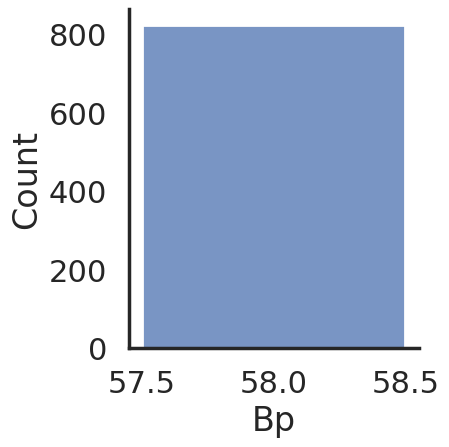

In [48]:
sns.displot(df.groupby(['run_id' ]).Bp.count().reset_index().sort_values('Bp').Bp)
plt.show()

In [49]:
mse_df.nsmallest(columns='MSE', n=20)

,Sample,full name,Group,compare_points,MSE,run_id,sen_param_model,idx,model,sen_param,sen_param_value,f_scale
2600,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,382.779619,vpro_ponly_pro99_least_square_MIXO_1,NaN,vpro,MIXO,Mp,3.708954e-06,1
2601,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,382.779619,vpro_ponly_pro99_least_square_MIXO_1,NaN,vpro,MIXO,gammaDp,3.518263e-01,1
2602,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,382.779619,vpro_ponly_pro99_least_square_MIXO_1,NaN,vpro,MIXO,EOp,3.502071e-07,1
2603,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,382.779619,vpro_ponly_pro99_least_square_MIXO_1,NaN,vpro,MIXO,KONp,2.900275e-02,1
2604,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,382.779619,vpro_ponly_pro99_least_square_MIXO_1,NaN,vpro,MIXO,KINp,2.301573e-01,1
2605,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,382.779619,vpro_ponly_pro99_least_square_MIXO_1,NaN,vpro,MIXO,KOCp,3.699209e-02,1
2606,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,382.779619,vpro_ponly_pro99_least_square_MIXO_1,NaN,vpro,MIXO,KICp,5.449243e-02,1
2607,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,382.779619,vpro_ponly_pro99_least_square_MIXO_1,NaN,vpro,MIXO,VmaxONp,3.331393e-06,1
2608,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,382.779619,vpro_ponly_pro99_least_square_MIXO_1,NaN,vpro,MIXO,VmaxINp,2.147123e-05,1
2609,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,382.779619,vpro_ponly_pro99_least_square_MIXO_1,NaN,vpro,MIXO,VmaxOCp,1.142720e-05,1


In [50]:
mse_df['mode'] = 'sensitivity'
mse_df.loc[mse_df.idx.isin(['baseline']), 'mode'] = 'baseline'
mse_df.loc[mse_df.idx.isin(['vpro']), 'mode'] = 'vpro'


In [51]:
basedf['mode'] = 'sensitivity'
basedf.loc[basedf.idx.isin(['baseline']), 'mode'] = 'baseline'
basedf.loc[basedf.idx.isin(['vpro']), 'mode'] = 'vpro'


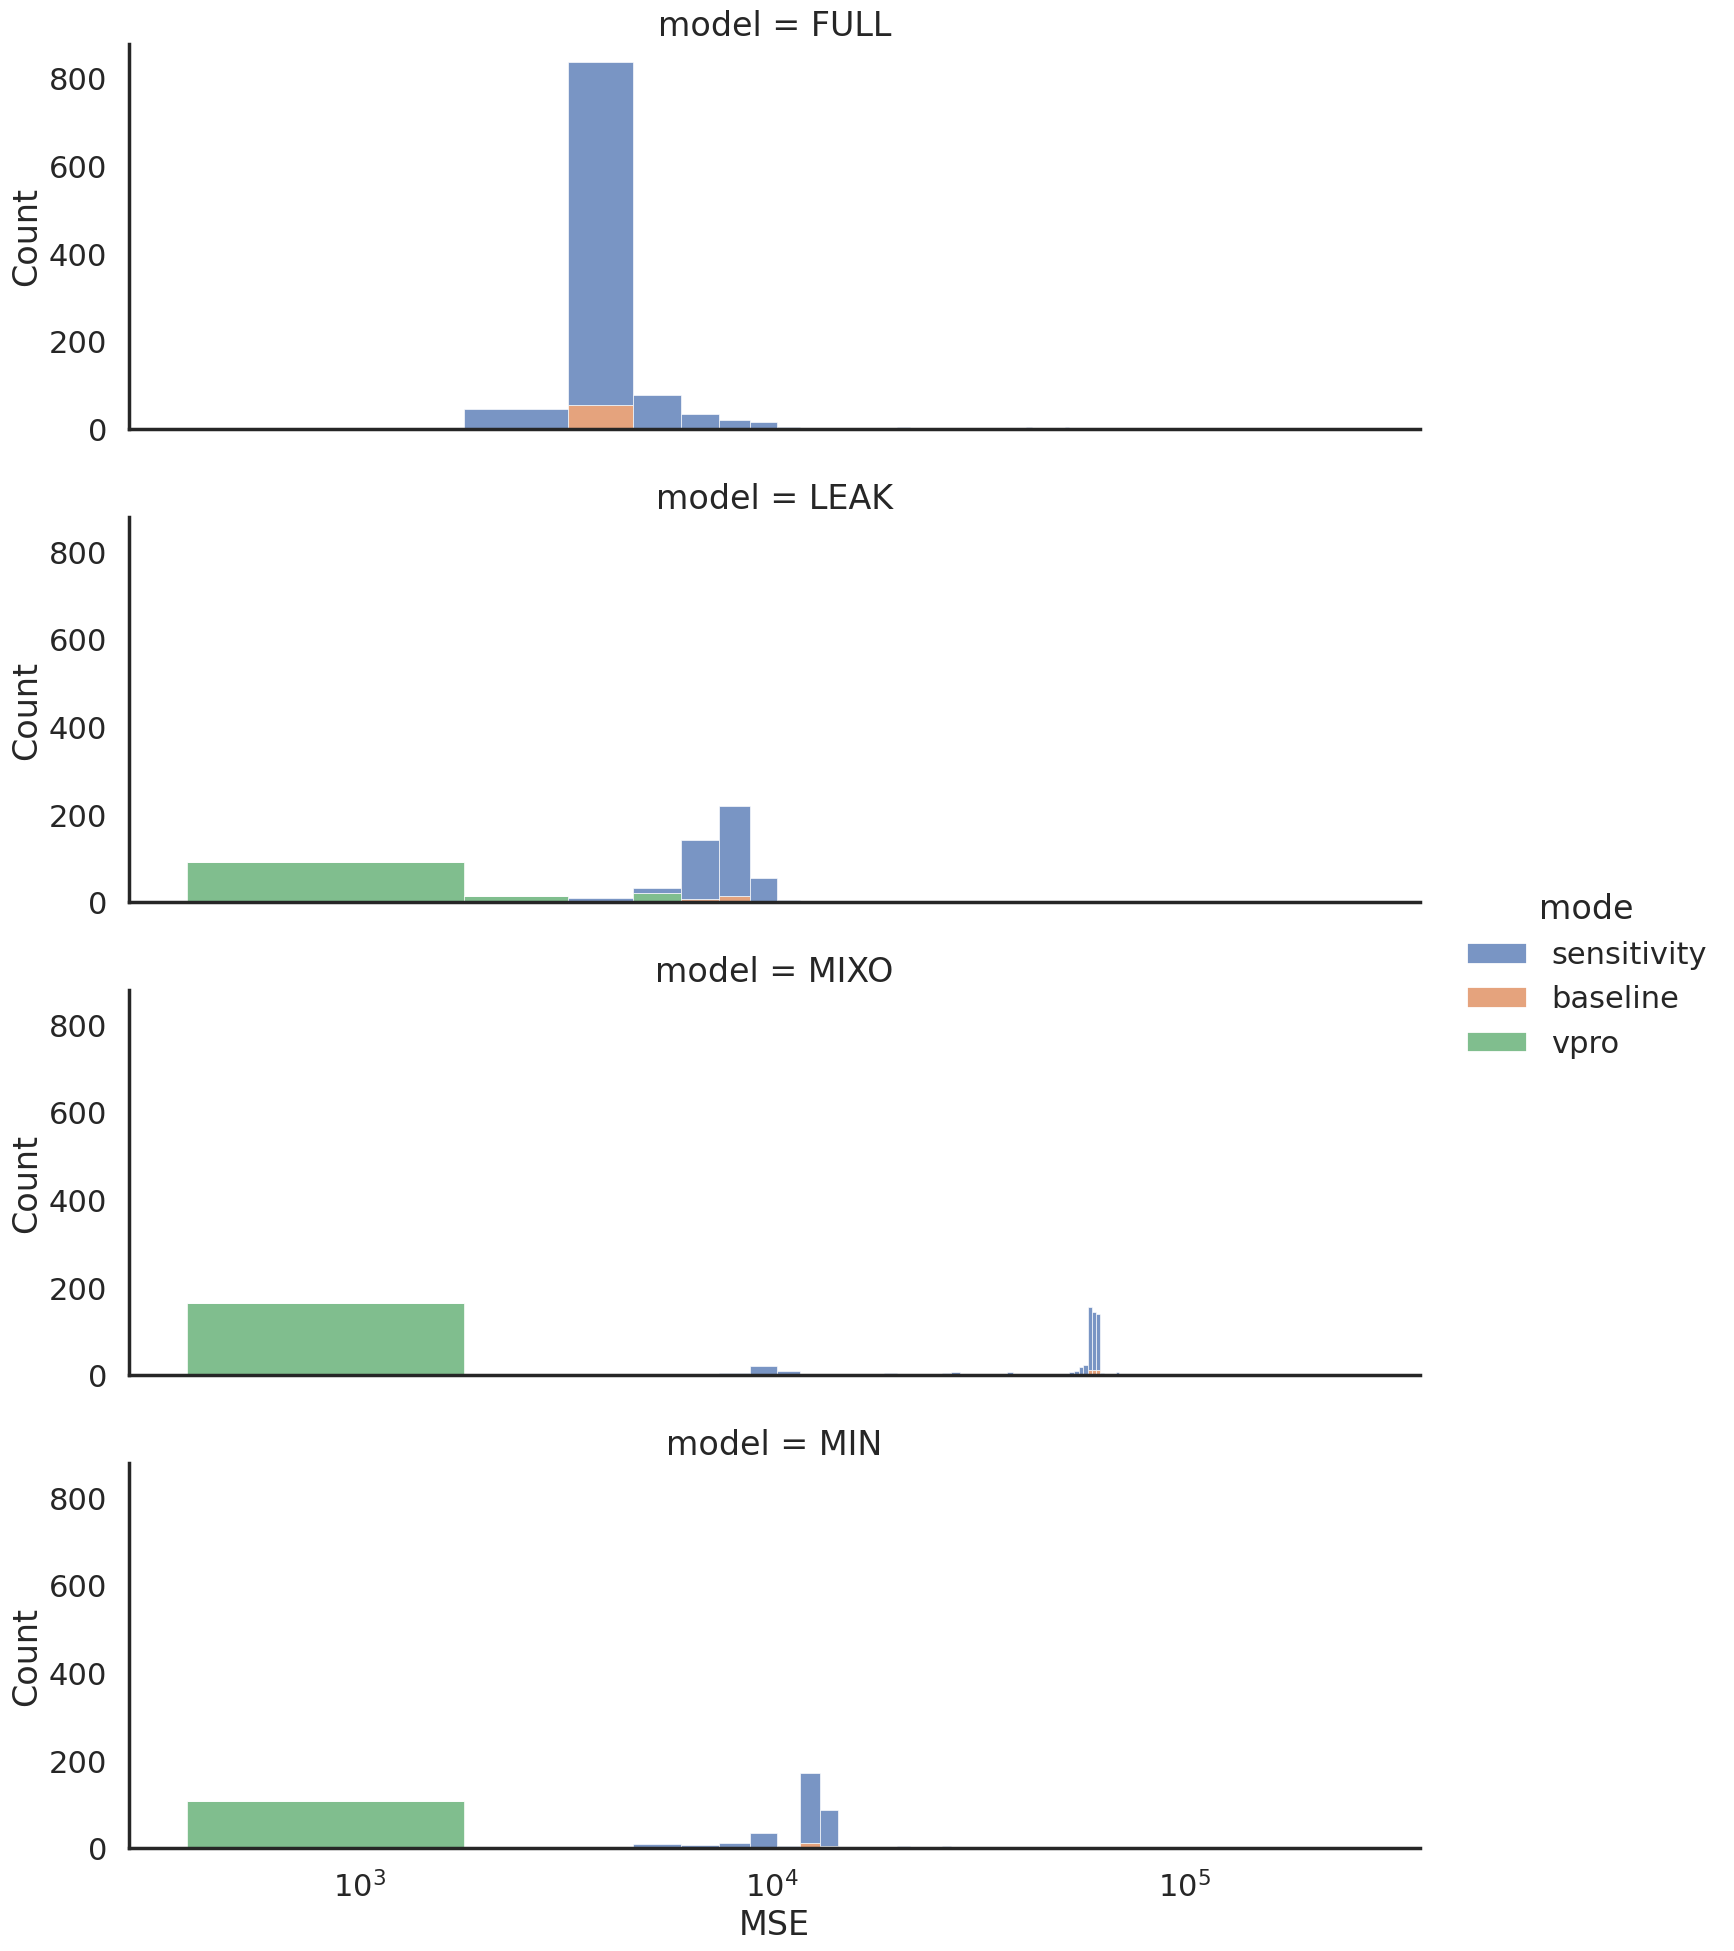

In [52]:
sns.displot(mse_df, x='MSE',aspect=3, row='model', hue='mode',multiple='stack' )
#sns.distplot(sum_df.p_err, label='P')
#sns.distplot(sum_df.error, label='Total')
#plt.legend()
plt.xscale('log')
plt.show()


In [53]:
df.min()

Bp                                                               0.0
DON                                                         0.003298
RDON                                                             0.0
DIN                                                         0.000736
DOC                                                         0.036257
RDOC                                                             0.0
DIC                                                         0.009482
ROS                                                          0.07819
ABp                                                              0.0
ABh                                                              0.0
t                                                                0.0
day                                                              0.0
Bp[C]                                                            0.0
ABp[C]                                                           0.0
ABh[C]                            

In [54]:
basedf.min()

/tmp/ipykernel_867833/2505142616.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  basedf.min()


Bp                              0.0
DON                        0.002532
RDON                            0.0
DIN                        0.000148
DOC                           132.5
RDOC                            0.0
DIC                        0.002388
ROS                         0.07819
ABp                             0.0
ABh                             0.0
t                               0.0
day                             0.0
Bp[C]                           0.0
ABp[C]                          0.0
ABh[C]                          0.0
run_id    baseline_ponly_pro99_FULL
idx                        baseline
model                          FULL
mode                       baseline
dtype: object

In [55]:
mse_df.idx.value_counts()

vpro        399
baseline    126
19          126
17          123
2           123
3           123
18          123
11          123
13          123
9           123
5           123
0           123
14          123
4           123
10          123
12          123
6           123
16          123
7           123
8           123
1           123
15          123
Name: idx, dtype: int64

In [56]:
sns.color_palette('Dark2')

In [57]:
model_name = 'MIN'
mpalette = sns.color_palette('Dark2', n_colors=3)
morder = ['sensitivity', 'baseline', 'vpro']
sensitivity_color= mpalette[0]
baseline_color= mpalette[1]
vpro_color= mpalette[2]

min_porder = ['VmaxINp', 'KINp', 'VmaxICp', 'KICp', 'Mp', 'gammaDp']


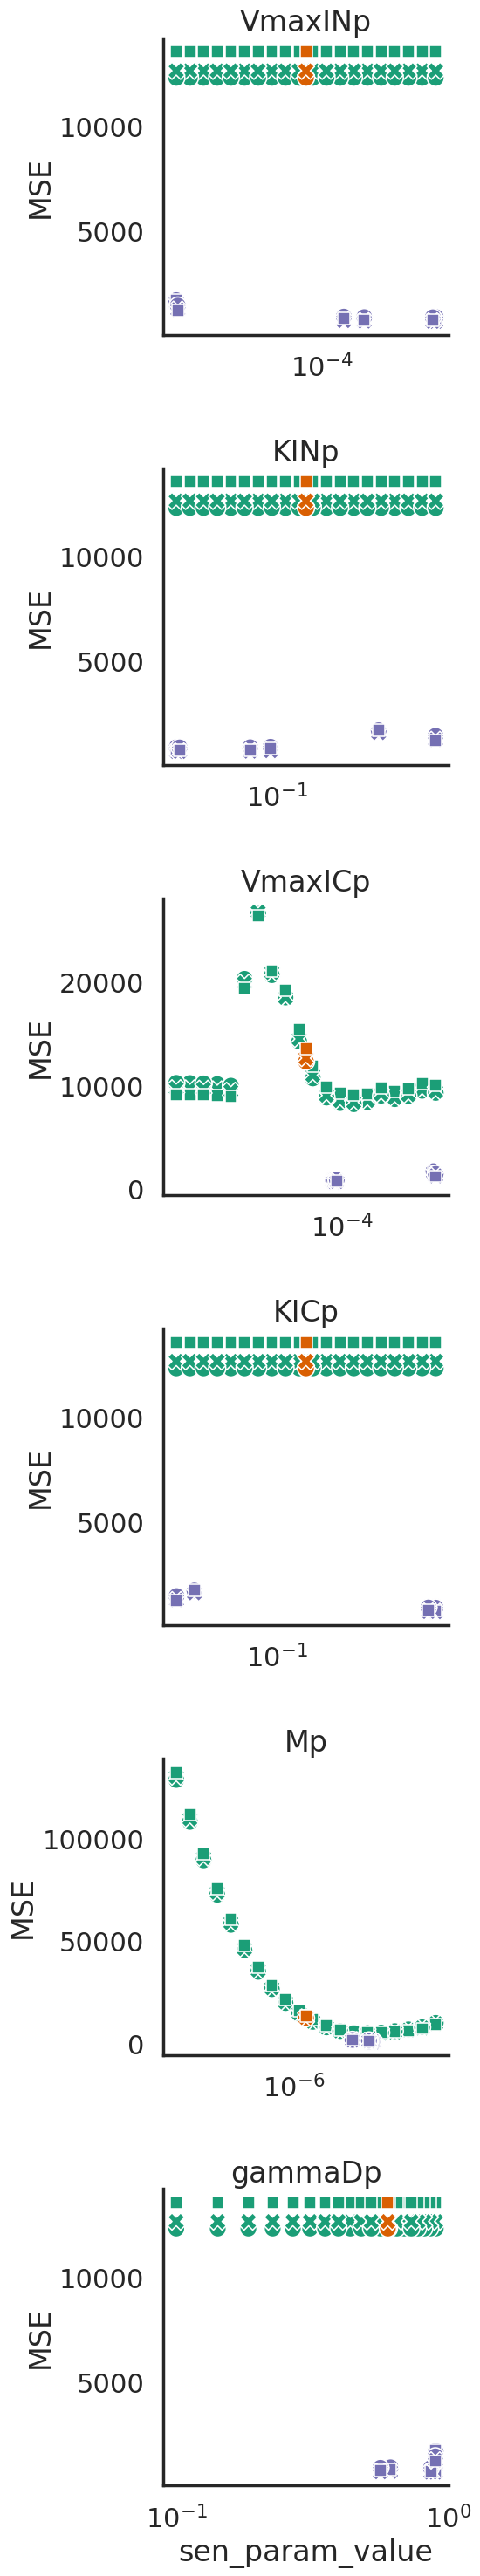

In [58]:
g = sns.relplot(
    data=mse_df.loc[mse_df.model.isin([model_name])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=2,
    row_order = min_porder,
    style='Sample', 
    hue ='mode', legend=False, palette=mpalette, hue_order=morder,
    s=200,
    aspect=1.2, #size='mode', size_order=['baseline', 'vpro', 'sensitivity'], sizes=(1000,500),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(ylim=(50,200))
g.set(xscale='log')
g.set_titles(row_template='{row_name}')

In [ ]:
for m in ['MIN']:
    mdf2 = df.loc[df.model.isin([m])].melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=['Bp'])                            
    mdf2['Day'] =mdf2['day'].round(5)
    #mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
    mdf2['param_name'] =  mdf2['sen_param'] 

    #mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


    g = sns.relplot(
        data=mdf2, 
        x='Day', y='value',
        hue='variable', palette=[sensitivity_color], #hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        col='sen_param', #col_order= paramorder,
        col_order = min_porder,
        col_wrap=1,
        kind='line', #lw=1,
        aspect=1.2, legend=False,
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
        
    )# .set(ylim=(0,150))

    for ax in g.axes:
        sns.lineplot(
            data=refdf,
            x='day', y='ref_Bp',
            estimator=None, units='Sample',
            color='black', ax=ax
        )
        sns.lineplot(
            data=basedf.loc[basedf.model.isin([m])],
            x='day', y='Bp',
            estimator=None, units='run_id',
            hue= 'mode', hue_order=morder[1:], palette=mpalette[1:], legend=False, 
            ax=ax,
        )
        

    #g.map_dataframe(pp)


    g.set(ylabel='umol N/L')
    g.set_titles(col_template='{col_name}',)
    #plt.suptitle(m, y=1)
    plt.show()

In [ ]:
#base_df['model_'] = base_df['model_']

g = sns.relplot(
    data=basedf,# .loc[basedf.model.isin([m])],
    x='day', y='Bp', col='model', col_order=['MIN', 'LEAK', 'MIXO'],
    estimator=None, units='run_id', kind='line',
    hue= 'mode', hue_order=morder[1:], palette=mpalette[1:], legend=False, 
)
for ax in g.axes_dict.values():
    sns.lineplot(
        data=refdf,
        x='day', y='ref_Bp',
        estimator=None, units='Sample',
        color='black', ax=ax
    )
g.set_titles(col_template='{col_name}',)
g.set(ylabel='umol N/L')


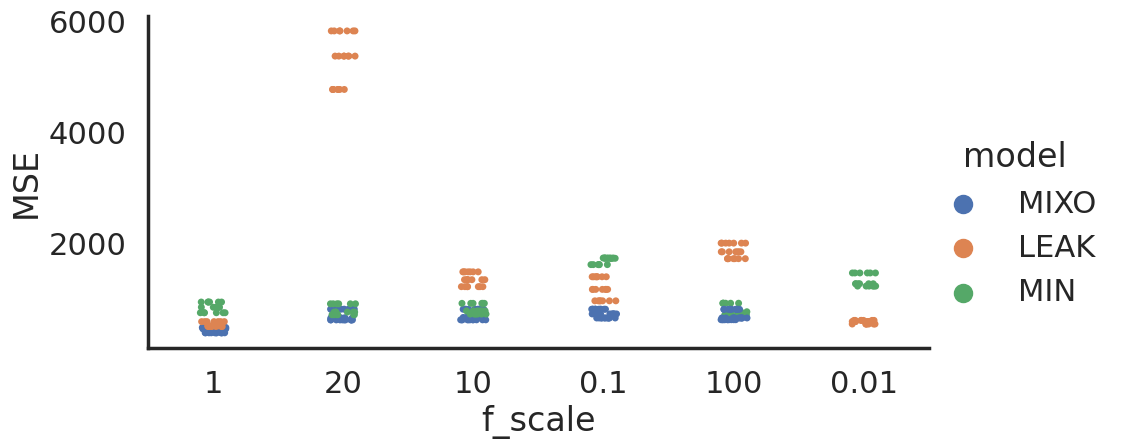

In [60]:
sns.catplot(
    data=basemse_df.loc[basemse_df.idx.isin(['vpro'])],
    x='f_scale', y='MSE', aspect=2, hue='model',
)

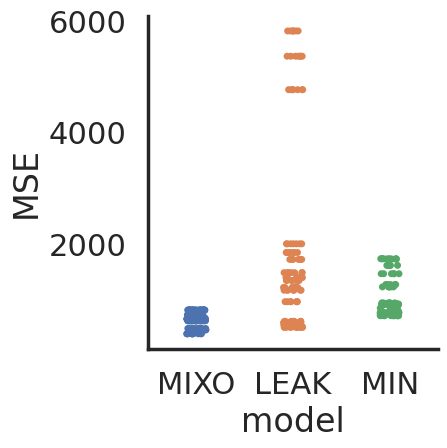

In [62]:
sns.catplot(
    data=basemse_df.loc[basemse_df.idx.isin(['vpro'])],
    x='model', y='MSE', aspect=1, hue='model',
)

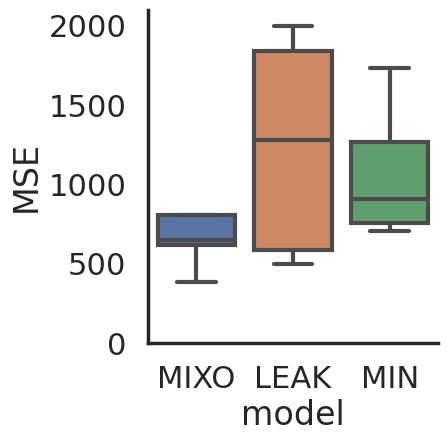

In [66]:
sns.catplot(
    data=basemse_df.loc[basemse_df.idx.isin(['vpro'])],
    x='model', y='MSE', aspect=1, hue='model',kind='box', dodge=False,
).set(ylim=(0,2100))

In [72]:
basemse_df.loc[basemse_df.idx.isin(['vpro'])]. nlargest(50,'MSE')

,Sample,full name,Group,compare_points,MSE,run_id,idx,model,f_scale,sen_param,sen_param_value
2116,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,5820.877416,vpro_ponly_pro99_least_square_LEAK_20,vpro,LEAK,20,Mp,2.777464e-07
2117,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,5820.877416,vpro_ponly_pro99_least_square_LEAK_20,vpro,LEAK,20,gammaDp,8.993753e-01
2121,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,5820.877416,vpro_ponly_pro99_least_square_LEAK_20,vpro,LEAK,20,EOp,4.032195e-06
2126,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,5820.877416,vpro_ponly_pro99_least_square_LEAK_20,vpro,LEAK,20,KINp,7.021538e-01
2128,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,5820.877416,vpro_ponly_pro99_least_square_LEAK_20,vpro,LEAK,20,KICp,7.002595e-01
2134,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,5820.877416,vpro_ponly_pro99_least_square_LEAK_20,vpro,LEAK,20,VmaxINp,1.640195e-05
2136,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,5820.877416,vpro_ponly_pro99_least_square_LEAK_20,vpro,LEAK,20,VmaxICp,1.300669e-04
2163,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,5367.359803,vpro_ponly_pro99_least_square_LEAK_20,vpro,LEAK,20,Mp,2.777464e-07
2164,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,5367.359803,vpro_ponly_pro99_least_square_LEAK_20,vpro,LEAK,20,gammaDp,8.993753e-01
2168,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,5367.359803,vpro_ponly_pro99_least_square_LEAK_20,vpro,LEAK,20,EOp,4.032195e-06


In [ ]:
g = sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['LEAK'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=2,
    style='Sample', 
    hue ='mode',
    s=100,
    aspect=1.2, #size='mode', size_order=['baseline', 'vpro', 'sensitivity'], sizes=(1000,500),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(ylim=(50,200))
g.set(xscale='log')
g.set_titles(row_template='{row_name}')

In [ ]:
g = sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['MIXO'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=2,
    style='Sample', 
    hue ='mode',
    s=100,
    aspect=1.2, #size='mode', size_order=['baseline', 'vpro', 'sensitivity'], sizes=(1000,500),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(ylim=(50,200))
g.set(xscale='log')
g.set_titles(row_template='{row_name}')

In [ ]:
mse_df.loc[mse_df.model.isin(['MIN'])].drop_duplicates(['run_id']).groupby (['sen_param', 'model'])['idx'].count()

In [ ]:
lowest_ids = mse_df.nsmallest(columns='MSE', n=10)['run_id']

In [ ]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=pnorder)                            
mdf2['Day'] =mdf2['day'].round(5)
#mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
mdf2['param_name'] =  mdf2['sen_param'] 

g = sns.relplot(
    data=mdf2.loc[mdf2.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=pnorder, palette=pnpalette,
    #estimator=None, units='run_id',
    col='sen_param', #col_order=lowest_ids, 
    col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf.loc[refdf.Group.isin(['Axenic'])], x='day', y='ref_Bp', ax=ax, s=100, legend=False, color=PCOLOR)
    #sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [ ]:
plt.show()

In [ ]:
lowest_ids